<a href="https://colab.research.google.com/github/aimat163/python/blob/main/ABC_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from datetime import timedelta
import pandas as pd
!pip install abc-analysis
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from abc_analysis import abc_analysis

In [12]:
df_order_items = pd.read_csv('/content/drive/MyDrive/abcxyz.csv', low_memory=False)

In [13]:
df_order_items.head()

,id,summa,order_date,status,pay_summa,order_profit,user_id,kr_name,kr_route,route_start,route_end
0,57764,20100,2022-08-29 20:08:19,5,20100,1809.00,36406,NaN,Москва – Мышкин – Москва,Москва,Москва
1,33528,158000,2022-03-16 17:34:40,5,79000,NaN,21395,Архитектурная мозаика,Москва – Углич – Тутаев – Рыбинск – Череповец ...,Москва,Москва
2,33527,159606,2022-03-16 17:24:42,5,159606,27266.48,9251,NaN,Москва – Санкт-Петербург,Москва,Санкт-Петербург
3,33462,31200,2022-03-16 10:17:26,5,31200,3978.00,21355,NaN,Н.Новгород-Казань-Самара,Нижний Новгород,Самара
4,33220,64100,2022-03-14 15:21:43,5,64100,7531.75,10145,Северная Венеция,Москва – Углич – Горицы – Кижи – Свирьстрой – ...,Москва,Санкт-Петербург


In [15]:
df_order_items.dtypes

id                int64
summa             int64
order_date       object
status            int64
pay_summa         int64
order_profit    float64
user_id           int64
kr_name          object
kr_route         object
route_start      object
route_end        object
dtype: object

In [19]:
#вычисление месяца сделки и добавления столбца quantity со значением 1 для подсчета сделок

df_order_items['order_date'] = pd.to_datetime(df_order_items['order_date'])

df_order_items = df_order_items.assign(month = pd.to_datetime(df_order_items['order_date']).dt.month )

df_order_items['quantity'] = '1'

df_order_items.head()

,id,summa,order_date,status,pay_summa,order_profit,user_id,kr_name,kr_route,route_start,route_end,month,quantity
0,57764,20100,2022-08-29 20:08:19,5,20100,1809.00,36406,NaN,Москва – Мышкин – Москва,Москва,Москва,8,1
1,33528,158000,2022-03-16 17:34:40,5,79000,NaN,21395,Архитектурная мозаика,Москва – Углич – Тутаев – Рыбинск – Череповец ...,Москва,Москва,3,1
2,33527,159606,2022-03-16 17:24:42,5,159606,27266.48,9251,NaN,Москва – Санкт-Петербург,Москва,Санкт-Петербург,3,1
3,33462,31200,2022-03-16 10:17:26,5,31200,3978.00,21355,NaN,Н.Новгород-Казань-Самара,Нижний Новгород,Самара,3,1
4,33220,64100,2022-03-14 15:21:43,5,64100,7531.75,10145,Северная Венеция,Москва – Углич – Горицы – Кижи – Свирьстрой – ...,Москва,Санкт-Петербург,3,1


In [35]:
#группировка по направлению и месяцу
t = df_order_items.groupby(["kr_route", "month"])["quantity"].count().reset_index(name="count")

In [36]:
t.dtypes

kr_route    object
month        int64
count        int64
dtype: object

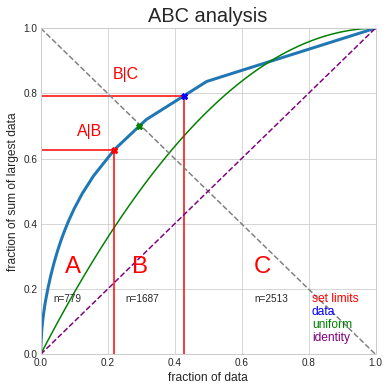

In [37]:
abc = abc_analysis(t['count'], True)

In [38]:
#присваиваем группу ABC товару
a_index = abc['Aind']
b_index = abc['Bind']
c_index = abc['Cind']

#запишем группу ABC товару
cond_list = [t.index.isin(a_index),
             t.index.isin(b_index),
             t.index.isin(c_index)]

choice_list = ['A','B','C']

t['abc'] = np.select(cond_list, choice_list)
t.sort_values(by=['count'], ascending=False)

,kr_route,month,count,abc
4376,Санкт-Петербург – Валаам – Санкт-Петербург,7,153,A
4375,Санкт-Петербург – Валаам – Санкт-Петербург,6,125,A
4374,Санкт-Петербург – Валаам – Санкт-Петербург,5,93,A
4373,Санкт-Петербург – Валаам – Санкт-Петербург,4,91,A
4377,Санкт-Петербург – Валаам – Санкт-Петербург,8,77,A
...,...,...,...,...
2236,Москва – Мышкин – Коприно – Тутаев – Нижний Но...,6,1,C
2238,Москва – Мышкин – Коприно – Углич – Москва,9,1,C
2239,Москва – Мышкин – Коприно – Ярославль – Нижний...,1,1,C
2246,Москва – Мышкин – Коприно – Ярославль – Тутаев...,2,1,C


In [41]:
t.to_csv("abc.csv", index = False)